In [68]:
import requests
import csv
from bs4 import BeautifulSoup            # scraping
from requests.models import Response     
import pandas as pd

# plotting image with word cloud
from PIL import Image                    # for wordcloud images
import numpy as np                       # convert image to np arrays
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS # generate word cloud
import matplotlib.pyplot as plt          # plotting

# nlp
import nltk                              # text processing
from nltk import word_tokenize           # split sentence into list of words
from nltk.corpus import stopwords        # remove: and,it,i,etc
import string                            # remove punctuation
from collections import defaultdict      # dictionary with values as lists
from nltk.stem import WordNetLemmatizer  # remove word endings etc

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Original code was from the below repo

# https://github.com/MrFuguDataScience/NLP
# https://github.com/MrFuguDataScience/Webscraping


In [69]:
# From the search result, 
# need to extract the url to the detailed job description page

def get_detailed_page_url(page):

    detail_url=[]
    
    for line in page.find_all('tbody'):
        pri=line.find('tr')

        for tag in pri.find_all('a',href=True):
            if tag.find('a',href=True):
                link='https://www.indeed.com'+tag['href']
                detail_url.append(link)
                
    return detail_url

In [70]:
# From each JD, sraping the elements that we are looking for
# Since there are JD that with/without some information, used try/except to avoid error

def get_data(detail_url):

    df = pd.DataFrame()

    for url in detail_url:

        page = requests.get(url)
        whole_page = BeautifulSoup(page.text, 'html.parser')
        
        try:
            position = whole_page.find('div', 'jobsearch-DesktopStickyContainer').get_text(strip=True, separator='\n').splitlines()[0]
        except AttributeError:
            position = ''
            
        try:
            company = whole_page.find('div', 'jobsearch-InlineCompanyRating').get_text(strip=True, separator='\n').splitlines()[0]
        except AttributeError:
            company = ''
            
        try:
            description = whole_page.find('div','jobsearch-jobDescriptionText').get_text(strip=True, separator=',')
        except AttributeError:
            description = ''

        line = pd.DataFrame([position, company, description]).T
        df = df.append(line, ignore_index=True)
    
    df.columns = ['position','company','desc']
    
    return df


In [110]:
# Store each elements in pandas dataframe

def get_search_list(position, location, num_pages):
    
    df_total = pd.DataFrame()
    
    for i in range(0,int(num_pages),1):

        pos,loc=position,location
        req=requests.get('https://www.indeed.com/jobs?q={}&l={}&start='.format(pos,loc)+str(i))
        search_page=BeautifulSoup(req.text,'html.parser')

        urls = get_detailed_page_url(search_page)
        df = get_data(urls)
        df_total = pd.concat([df_total, df], axis=0, ignore_index=True)
        

    return df_total

In [112]:
df = get_search_list('data engineer', 'california', 3)
df

,position,company,desc
0,Data Engineer,DivergeIT,Are you a Data Engineer looking to take the ne...
1,Data Engineer,Insight Global,"TITLE:,Data Engineer II,LOCATION:,Dublin, CA (..."
2,Data Engineer,CyberCoders,"Data Engineer,If you are a Data Engineer with ..."
3,Data Engineer,Kaygen,"Data Engineer,Location : Costa Mesa, CA,Durati..."
4,REMOTE Data Engineer - Spark/Scala,CyberCoders,"REMOTE Data Engineer - Spark/Scala,If you are ..."
5,Data Engineer,Federal Reserve Bank of San Francisco,"Company,Federal Reserve Bank of San Francisco,..."
6,Data Engineer,Airtable,Airtable's unique approach to enabling end-use...
7,Data Engineer,StreetLight Data,StreetLight pioneered the use of Big Data anal...
8,Data Engineer - PySpark,Logic20/20 Inc.,"Company Description,About Logic20/20 We’re a f..."
9,Data Analyst / Engineer,BayStreet Research,"MARKET RESEARCH DATA ANALYST / ENGINEER,We are..."


In [73]:
# import each line of job description in dataframe and tokenize

def tokenization(desc):

    wrd_lst_tokens=[]
    for ikl in desc:
        punct=word_tokenize(''.join(j for j in ikl.lower() if j not in string.punctuation if not j.isdigit()))
        wrd_lst_tokens.append([punct])
    
    return wrd_lst_tokens


In [139]:

wrd_lst_tokens = tokenization(df['desc'])
pd.DataFrame(wrd_lst_tokens,columns=['desc_token'])

,desc_token
0,"[are, you, a, data, engineer, looking, to, tak..."
1,"[titledata, engineer, iilocationdublin, ca, re..."
2,"[data, engineerif, you, are, a, data, engineer..."
3,"[data, engineerlocation, costa, mesa, cadurati..."
4,"[remote, data, engineer, sparkscalaif, you, ar..."
5,"[companyfederal, reserve, bank, of, san, franc..."
6,"[airtables, unique, approach, to, enabling, en..."
7,"[streetlight, pioneered, the, use, of, big, da..."
8,"[company, descriptionabout, logic, we, ’, re, ..."
9,"[market, research, data, analyst, engineerwe, ..."


In [161]:
# Some words as well as default stop words are needed to be deleted
# Added more_wrd_to_remove to filter them

def remove_stopword(token_list):


    more_wrd_to_remove=['year','experience','user','employee','type','llc','member','youll',
    'various','range','position','end','service','leveljob','wide','card','bring',
    'sexual orientation','sexual', 'orientation','veteran','status','employer','year experience',
    'due','covid','natural origin','using','u','sexal','sexal orientation',
    'sexalorientation','decovid','de covid','technology','technical','work', 'will','data',
                       ]

    clean_stp_wrds=[]
    stopword = stopwords.words('english')
    stopword.extend(more_wrd_to_remove)
    for line in token_list:
        clean_stp_wrds.append([[k for k in line[0] if k not in stopword]])

    return clean_stp_wrds

In [162]:
clean_stp_wrds = remove_stopword(wrd_lst_tokens)
clean_stp_wrds

[[['engineer',
   'looking',
   'take',
   'next',
   'step',
   'career',
   'task',
   'orientated',
   'goal',
   'focused',
   'refusal',
   'allow',
   'team',
   'fail',
   'looking',
   'grow',
   'knowledge',
   'direct',
   'impact',
   'upon',
   'companydivergeit',
   'fastgrowing',
   'company',
   'provides',
   'information',
   'support',
   'likes',
   'mba',
   'nhl',
   'mlb',
   'hollywood',
   'entertainment',
   'companies',
   'many',
   'others',
   'across',
   'nationdata',
   'engineers',
   'consumers',
   'create',
   'populate',
   'optimal',
   'architectures',
   'structures',
   'systems',
   'meet',
   'client',
   '’',
   'internal',
   'business',
   'needsfull',
   'timestarting',
   'salary',
   'bachelors',
   'masters',
   'degreeopportunities',
   'domestic',
   'travel',
   'possibleabout',
   'jobas',
   'engineer',
   'divergeit',
   'focus',
   'design',
   'implementation',
   'operation',
   'management',
   'systems',
   'meet',
   'diverg

In [163]:
# Lemmatize and store them into dataframe

def lemmatization(words):

    indeed_text_cnts= pd.DataFrame()

    lemmatizer = WordNetLemmatizer()
    lemma_lst=[]
    for i in range(len(words)):
        for j in words[i][0]: # going inside each list and doing each word
            j=j.strip()
            lemma_lst.append([i,lemmatizer.lemmatize(j)]) # i keeps the position 

    def_dict=defaultdict(list)

    for i in lemma_lst:
        def_dict[i[0]].append(i[1]) # key=position,value:list of lists of strings

    indeed_text_cnts['lemma_words']=def_dict.values()
    
    return indeed_text_cnts


In [164]:
indeed_text_cnts = lemmatization(clean_stp_wrds)
indeed_text_cnts

C:\Users\Brandon\anaconda3\envs\py388\lib\site-packages\pandas\core\common.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,lemma_words
0,"[engineer, looking, take, next, step, career, ..."
1,"[titledata, engineer, iilocationdublin, ca, re..."
2,"[engineerif, engineer, spark, scala, please, r..."
3,"[engineerlocation, costa, mesa, caduration, ex..."
4,"[remote, engineer, sparkscalaif, engineer, spa..."
5,"[companyfederal, reserve, bank, san, francisco..."
6,"[airtables, unique, approach, enabling, enduse..."
7,"[streetlight, pioneered, use, big, analytics, ..."
8,"[company, descriptionabout, logic, ’, fivetime..."
9,"[market, research, analyst, engineerwe, boutiq..."


In [157]:
# Convert all word into 1 string to make wordcloud

def combine_all(lemma_words):

    combine_all_wrds=[]
    for i in lemma_words:
        for j in i:
            combine_all_wrds.append(j)
    all_wrds_str=' '.join(combine_all_wrds)
    
    return all_wrds_str

In [158]:
all_wrds_str = combine_all(indeed_text_cnts['lemma_words'])
all_wrds_str

'engineer looking take next step career task orientated goal focused refusal allow team fail looking grow knowledge direct impact upon companydivergeit fastgrowing company provides information support like mba nhl mlb hollywood entertainment company many others across nationdata engineer consumer create populate optimal architecture structure system meet client ’ internal business needsfull timestarting salary bachelor master degreeopportunities domestic travel possibleabout jobas engineer divergeit focus design implementation operation management system meet divergeit client ’ business need includes designing stored consumed integrated managed different entity digital system engineer together consumer determine create populate optimal architecture structure systemsdata engineer must also plan design optimize throughput query performance issue requires constantly updating expertise area platform network storage technology bandwidth management bus implication designadditionally play key

In [159]:
# Generate wordcloud with the skills only

def gen_wc(combined_string):

    img_mask=np.array(Image.open('wc.png'))
    
    wc=WordCloud(background_color='white',max_words=100,max_font_size=100,random_state=1,
        mask=img_mask,contour_color='red',min_font_size=1,normalize_plurals=True, collocations = False)


    wc.generate(combined_string)

    plt.figure(figsize=(30,11))
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.show()

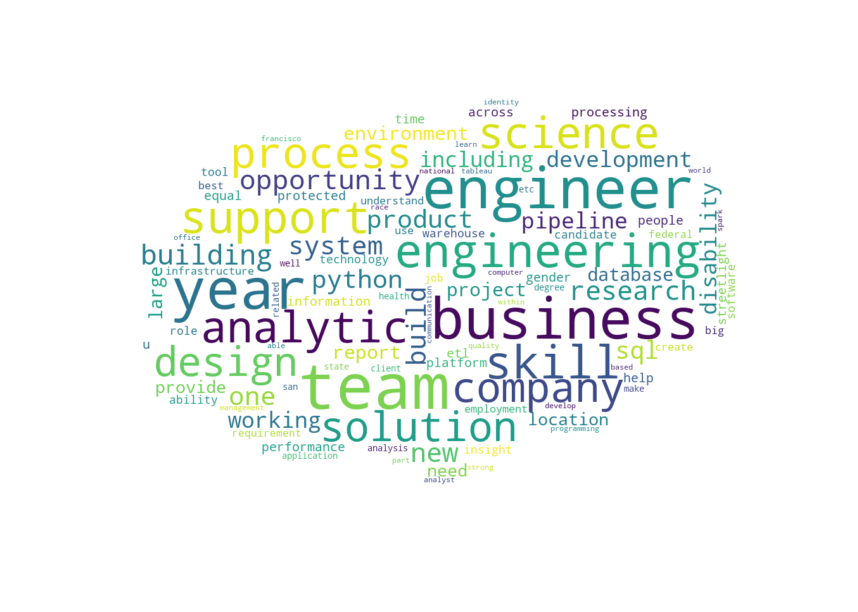

In [160]:
gen_wc(all_wrds_str)

In [104]:
# make the list of required skills and check if those exists in the job description

skill_words=['Python','SQL','AWS', 'Machine learning','Deep learning','Text mining',
            'NLP','SAS','Tableau','Sagemaker','Tensorflow','Spark', 'numpy', 'MongDB','PSQL',
            "Postgres", 'Pandas', 'RESTFUL','NLP','Statistics','Algorithms','Visualization',
            'GCP','Google Cloud','Naive Bayes','Random Forest','Bachelors','Masters'
            'Java','Pyspark','PostgreSQL','MySQL','Github','Docker','Machine Learning','C+',
            'C++','Pytorch','Jupyter Notebook','R Studio','R-Studio','Forecasting','Hive',
            'PhD','GCP','Numpy','NoSQL','Neo4j','Neural Network','Clustering','Linear Algebra',
            'Google Colab','Data Mining','Regression','Time Series','ETL','Data Wrangling',
            'Web Scraping','Feature Extraction','Featuring Engineering','Scipy','ML','DL',' Amazon Web Services'
            'Kafka','Hadoop','Airflow','NoSQL','CDK','Automation','PySpark','Scala','Parquet','JSON',
            'HBase', 'Redis', 'MongoDB','Cassandra','Redshift','Azure','HDFS','S3','go','Spark','Stack',
             'Storm','Flink','flask','snowflake','Flume','Matillion','HEVO','Mahout','cloud','DevOps',
            'AI']


def matched_skill_list(skills, lemma_words):
    

    skill_list=[x.lower() for x in skill_words]  # convert list to lowercase to parse

    matched_skills=[]
    for i in range(len(lemma_words)):

        matched=[x for x in skill_list if x in lemma_words[i]]
        matched_skills.append(matched)
        
    return matched_skills
    

In [106]:
matched_skill = matched_skill_list(skill_words, indeed_text_cnts['lemma_words'])

In [99]:

    
combine_all_skills=[]
for i in matched_skills:
#     print(type(i))
#     print(len(i))
    for j in i:
        combine_all_skills.append(j)
# len(combine_all_wrds)
all_skills_str=' '.join(combine_all_skills)
all_skills_str

In [108]:
all_skills_str = combine_all(matched_skill)

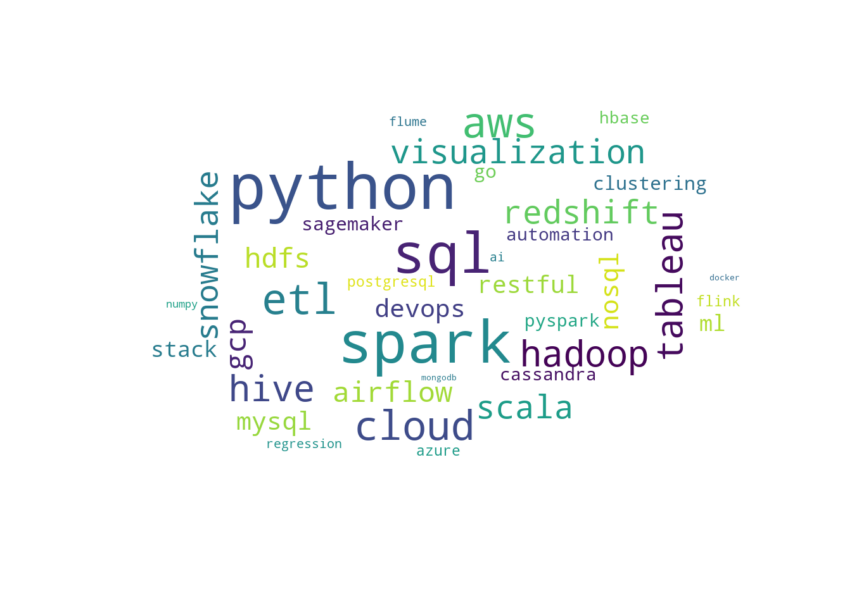

In [109]:
gen_wc(all_skills_str)